# ASSIGNMENT DATA SCIENCE - PART 1
## Problem statement
Our road networks are equipped with various sensors that measure traffic. ANPR (Automatic Number Plate Recognition) cameras monitor the road and use character recognition algorithms to detect and read license plates of vehicles. Inductive counting loops on the other hand, are placed under the road surface and can detect vehicles passing over them.

In this particular case, the ANPR camera **CPT-C-0002.1** and the inductive counting loop **01A** are located on the same road segment close to each other. This means that we expect these two sensors to produce identical information about the traffic they observe.

The goal of this exercise is to make an analysis in order to demonstrate that (1) the two sensors work fine, or (2) one sensor is working properly and the other not, or (3) both sensors produce erroneous results. The analysis should be focused on the vehicle counts provided by the two sensors, but speed information is also provided and can be used.

Make use of Python, its libraries and this Jupyter notebook to help you out and visualise your findings. The Jupyter notebook will be used to discuss your analysis, used logic and conclusions with members of the data science team. Every additional bit of useful information about the data is welcome and can be discussed.

We wish you the best of luck! If you have any questions, please use the following email address: bruno.cornelis@macq.eu




## Librairies utiles

In [ ]:
from google.colab import drive  #mount the drive
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns # Pour la visulation des données

## Montage du drive

In [ ]:
drive.mount('/content/drive/')
# Chemin vers les fichier csv de donnée
PATH =  '/content/drive/My Drive/Colab Notebooks/2024/internship/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Chargement des fichiers de données

In [ ]:
dataset_pboc_data_rv = pd.read_csv(PATH + "pboc_data_rv.csv")
dataset_pfic_data_rv = pd.read_csv(PATH + "pfic_data_rv.csv")

## Exploration des données

## ANPR camera (*pfic_data_rv.csv*)

### Déscription des features

**Features**:
- **B**: unique ID of a camera
- **lane**: id of the lane observed by the camera (-1:unknown, 1:lane1, 2:lane2). *Be careful:* this camera does not observe traffic on the fastest lane. We don't know if 1 or 2 is the lane in the middle.
- **l**: classification of the vehicle made by the camera (-1:unknown, 0:short vehicle, 1:long vehicle).
- **T**: time of the observation. The data is aggregated every 5 minutes.
- **rs**: average speed returned by the radar fixed to the camera in km/h.
- **speedest**: speed estimation from the camera in km/h.
- **count**: count of the vehicles.

**Explanation of the last row of the Data Frame**:  
There is 1 long vehicle detected by camera CPT-C-0048.2 on lane 1 between 16:30 and 16:35. The average speed is 65.9 km/h from the radar and 66.6 from the camera

### Type des données

In [ ]:
dataset_pfic_data_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149371 entries, 0 to 149370
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   B         149371 non-null  object 
 1   lane      149371 non-null  int64  
 2   l         149371 non-null  int64  
 3   T         149371 non-null  object 
 4   rs        79363 non-null   float64
 5   speedest  79363 non-null   float64
 6   count     149371 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 8.0+ MB


### Visualisation des données

In [ ]:
dataset_pfic_data_rv

,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 13:30:00+02:00,NaN,NaN,0
2,CPT-C-0002.1,-1,-1,2021-10-04 13:35:00+02:00,NaN,NaN,0
3,CPT-C-0002.1,-1,-1,2021-10-04 13:40:00+02:00,NaN,NaN,0
4,CPT-C-0002.1,-1,-1,2021-10-04 13:45:00+02:00,NaN,NaN,0
...,...,...,...,...,...,...,...
149366,CPT-C-0048.2,1,1,2021-10-31 16:10:00+01:00,NaN,NaN,0
149367,CPT-C-0048.2,1,1,2021-10-31 16:15:00+01:00,NaN,NaN,0
149368,CPT-C-0048.2,1,1,2021-10-31 16:20:00+01:00,NaN,NaN,0
149369,CPT-C-0048.2,1,1,2021-10-31 16:25:00+01:00,77.4,75.1,1


Nous pouvons déjà voir que que certaines données qui ne nous intéressent pas sont présentent dans le dataset donc nous devons filtrer les données pour ne garder que les données concernant la caméra **CPT-C-0002.1**

### Filtrage du dataset dataset_pfic_data_rv.csv

In [106]:
dataset_pfic_data_rv = dataset_pfic_data_rv[dataset_pfic_data_rv["B"] == "CPT-C-0002.1"]
dataset_pfic_data_rv = dataset_pfic_data_rv.reset_index(drop=True) # re-order indexes
dataset_pfic_data_rv

,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 13:30:00+02:00,0.0,0.0,0
2,CPT-C-0002.1,-1,-1,2021-10-04 13:35:00+02:00,0.0,0.0,0
3,CPT-C-0002.1,-1,-1,2021-10-04 13:40:00+02:00,0.0,0.0,0
4,CPT-C-0002.1,-1,-1,2021-10-04 13:45:00+02:00,0.0,0.0,0
...,...,...,...,...,...,...,...
79034,CPT-C-0002.1,2,1,2021-10-31 21:30:00+01:00,0.0,0.0,0
79035,CPT-C-0002.1,2,1,2021-10-31 21:35:00+01:00,0.0,0.0,0
79036,CPT-C-0002.1,2,1,2021-10-31 21:40:00+01:00,0.0,0.0,0
79037,CPT-C-0002.1,2,1,2021-10-31 21:45:00+01:00,0.0,0.0,0


### Données manquantes

In [ ]:
dataset_pfic_data_rv.isnull().any()

B           False
lane        False
l           False
T           False
rs           True
speedest     True
count       False
dtype: bool

Nous pouvons voir que les seules colonnes qui admmettent des valeurs manquantes sont les colonnes **rs** et **speedest** qui nous donnent des informations liées à la vitesse des véhicules qui ont été detectées durant le laps de temps donné par la colonne **T**

Mais en analysant les données, ont peut voir que ca a du sens que ces colonnes admettent des valeurs manquantes (NA), car il y'a une certaine correlation entre les colonnes **count**, **rs** et **speedest**

In [ ]:
dataset_pfic_data_rv.query('(speedest.isna() and not rs.isna()) or (not speedest.isna() and rs.isna())')

,B,lane,l,T,rs,speedest,count


Ensuite, on voit ci-dessous que chaque fois qu'une valeur est manquant alors la valeure de **count** est **0**

In [ ]:
dataset_pfic_data_rv.query('speedest.isna() and rs.isna() and count > 0')

,B,lane,l,T,rs,speedest,count


### Forme originale des données

In [ ]:
dataset_pfic_data_rv.shape

(79039, 7)

### Forme des données aprés suppréssion des NA

In [ ]:
dataset_pfic_data_rv.dropna().shape

(46879, 7)

Pour eviter de perdre des données, nous allons remplir les données manquantes avec des 0 afin d'éviter de perdre des données.

### Remplacement des données NA par 0

In [ ]:
dataset_pfic_data_rv = dataset_pfic_data_rv.fillna(0)

### Vérification  

In [ ]:
dataset_pfic_data_rv.isnull().any()

B           False
lane        False
l           False
T           False
rs          False
speedest    False
count       False
dtype: bool

In [ ]:
dataset_pfic_data_rv

,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 13:30:00+02:00,0.0,0.0,0
2,CPT-C-0002.1,-1,-1,2021-10-04 13:35:00+02:00,0.0,0.0,0
3,CPT-C-0002.1,-1,-1,2021-10-04 13:40:00+02:00,0.0,0.0,0
4,CPT-C-0002.1,-1,-1,2021-10-04 13:45:00+02:00,0.0,0.0,0
...,...,...,...,...,...,...,...
79034,CPT-C-0002.1,2,1,2021-10-31 21:30:00+01:00,0.0,0.0,0
79035,CPT-C-0002.1,2,1,2021-10-31 21:35:00+01:00,0.0,0.0,0
79036,CPT-C-0002.1,2,1,2021-10-31 21:40:00+01:00,0.0,0.0,0
79037,CPT-C-0002.1,2,1,2021-10-31 21:45:00+01:00,0.0,0.0,0


### Statistiques sur les données

In [ ]:
dataset_pfic_data_rv.describe()

,lane,l,rs,speedest,count
count,79039.000000,79039.000000,79039.000000,79039.000000,79039.000000
mean,0.694531,0.013183,57.633860,39.417349,12.121383
std,1.238437,0.814590,52.620645,51.966976,21.740802
min,-1.000000,-1.000000,0.000000,-3.600000,0.000000
25%,-1.000000,-1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,87.511538,0.000000,2.000000
75%,2.000000,1.000000,107.063068,99.924591,12.000000
max,2.000000,1.000000,225.700000,579.300000,142.000000


### Remarques :

* La colonne speedest contient des données qui sont non-réalistes

In [ ]:
dataset_pfic_data_rv.query('rs < 10 ')

,B,lane,l,T,rs,speedest,count
35236,CPT-C-0002.1,1,0,2021-10-03 20:30:00,2.400000,105.077778,36
35240,CPT-C-0002.1,1,0,2021-10-03 20:50:00,2.981481,110.892593,27
35241,CPT-C-0002.1,1,0,2021-10-03 20:55:00,5.868182,109.772727,22
37519,CPT-C-0002.1,1,0,2021-10-11 18:45:00,6.234615,108.553846,26


* **speedest** contient parfois des valuer négatives pour la vitesse.

In [ ]:
dataset_pfic_data_rv.query('speedest < 0 ')

,B,lane,l,T,rs,speedest,count
3495,CPT-C-0002.1,-1,-1,2021-10-16 16:40:00+02:00,91.800000,-3.600000,1
4848,CPT-C-0002.1,-1,-1,2021-10-21 09:25:00+02:00,0.000000,-3.600000,1
16535,CPT-C-0002.1,-1,1,2021-10-01 00:40:00+02:00,0.000000,-1.000000,1
16551,CPT-C-0002.1,-1,1,2021-10-01 02:00:00+02:00,0.000000,-1.000000,1
16560,CPT-C-0002.1,-1,1,2021-10-01 02:45:00+02:00,0.000000,-1.000000,1
...,...,...,...,...,...,...,...
78320,CPT-C-0002.1,2,1,2021-10-29 11:00:00+02:00,90.250000,-2.300000,2
78323,CPT-C-0002.1,2,1,2021-10-29 11:15:00+02:00,92.000000,-2.300000,2
78326,CPT-C-0002.1,2,1,2021-10-29 11:30:00+02:00,111.800000,-1.000000,1
78331,CPT-C-0002.1,2,1,2021-10-29 11:55:00+02:00,91.400000,-2.300000,2


* Il y'a parfois de gros écart dans la vitesse données par la colonne **rs** et l'estimation de vitesse donnée par la colonne **speedest**

---

## counting loop 01A (dataset_pboc_data_rv.csv)




### Déscription des features

**Features**:
- **classification_value**: classification of the detected vehicle. "short", "medium", "long" represent the length of the vehicle.
- **loop**: id of the loop placed on a single lane of the road. There is one loop on each lane of the road.
- **post**: unique id of the counting post containing the different loops.
- **timestamp**: time of the observation. *Important:* The data is aggregated every 5 minutes.
- **mean_speed_kmh**: average speed of the vehicles detected in km/h.
- **count**: count of the vehicles.

**Explanation for the second row of the Data Frame**:  
There are 4 long vehicles detected by loop 1 of post 01A between 00:05 and 00:10. The average speed of those 4 vehicles equals 81 km/h.  

### Type des données

In [ ]:
dataset_pboc_data_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132522 entries, 0 to 132521
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   classification_value  132522 non-null  object 
 1   loop                  132522 non-null  int64  
 2   post                  132522 non-null  object 
 3   timestamp             132522 non-null  object 
 4   mean_speed_kmh        70213 non-null   float64
 5   count                 132522 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.1+ MB


### Visualisation des données

In [ ]:
dataset_pboc_data_rv

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-10-01 00:00:00+02:00,NaN,0
1,long,1,01A,2021-10-01 00:05:00+02:00,81.000000,4
2,long,1,01A,2021-10-01 00:10:00+02:00,82.333333,3
3,long,1,01A,2021-10-01 00:15:00+02:00,85.000000,6
4,long,1,01A,2021-10-01 00:20:00+02:00,83.000000,1
...,...,...,...,...,...,...
132517,short,3,01A,2021-10-31 23:35:00+01:00,NaN,0
132518,short,3,01A,2021-10-31 23:40:00+01:00,NaN,0
132519,short,3,01A,2021-10-31 23:45:00+01:00,NaN,0
132520,short,3,01A,2021-10-31 23:50:00+01:00,NaN,0


### Filtrage des données

In [105]:
dataset_pboc_data_rv = dataset_pboc_data_rv[dataset_pboc_data_rv["post"] == "01A"]
dataset_pboc_data_rv = dataset_pboc_data_rv.reset_index(drop=True) # re-order indexes
dataset_pboc_data_rv

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-10-01 00:00:00+02:00,0.000000,0
1,long,1,01A,2021-10-01 00:05:00+02:00,81.000000,4
2,long,1,01A,2021-10-01 00:10:00+02:00,82.333333,3
3,long,1,01A,2021-10-01 00:15:00+02:00,85.000000,6
4,long,1,01A,2021-10-01 00:20:00+02:00,83.000000,1
...,...,...,...,...,...,...
80455,short,3,01A,2021-10-31 23:35:00+01:00,0.000000,0
80456,short,3,01A,2021-10-31 23:40:00+01:00,0.000000,0
80457,short,3,01A,2021-10-31 23:45:00+01:00,0.000000,0
80458,short,3,01A,2021-10-31 23:50:00+01:00,0.000000,0


### Données manquantes

In [ ]:
dataset_pboc_data_rv.isnull().any()

classification_value    False
loop                    False
post                    False
timestamp               False
mean_speed_kmh           True
count                   False
dtype: bool

In [ ]:
dataset_pboc_data_rv.query('mean_speed_kmh.isna() and count > 0')

,classification_value,loop,post,timestamp,mean_speed_kmh,count


In [ ]:
dataset_pboc_data_rv.shape

(80460, 6)

In [ ]:
dataset_pboc_data_rv.dropna().shape

(31563, 6)

In [ ]:
dataset_pboc_data_rv = dataset_pboc_data_rv.fillna(0)

In [ ]:
dataset_pboc_data_rv.isnull().any()

classification_value    False
loop                    False
post                    False
timestamp               False
mean_speed_kmh          False
count                   False
dtype: bool

In [ ]:
dataset_pboc_data_rv

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-10-01 00:00:00+02:00,0.000000,0
1,long,1,01A,2021-10-01 00:05:00+02:00,81.000000,4
2,long,1,01A,2021-10-01 00:10:00+02:00,82.333333,3
3,long,1,01A,2021-10-01 00:15:00+02:00,85.000000,6
4,long,1,01A,2021-10-01 00:20:00+02:00,83.000000,1
...,...,...,...,...,...,...
132517,short,3,01A,2021-10-31 23:35:00+01:00,0.000000,0
132518,short,3,01A,2021-10-31 23:40:00+01:00,0.000000,0
132519,short,3,01A,2021-10-31 23:45:00+01:00,0.000000,0
132520,short,3,01A,2021-10-31 23:50:00+01:00,0.000000,0


In [141]:
dataset_pboc_data_rv.describe()

,loop,timestamp,mean_speed_kmh,count
count,31563.000000,31563,31563.000000,31563.000000
mean,1.945031,2021-10-15 16:49:52.291607040,108.618856,18.450654
min,1.000000,2021-09-30 22:00:00,0.000000,1.000000
25%,1.000000,2021-10-08 09:20:00,96.000000,1.000000
50%,2.000000,2021-10-15 07:20:00,113.000000,5.000000
75%,2.000000,2021-10-22 12:30:00,120.451997,25.000000
max,3.000000,2021-10-31 22:55:00,960.000000,148.000000
std,0.726481,NaN,22.465032,25.942237


In [150]:
dataset_pboc_data_rv = dataset_pboc_data_rv.query("count > 0")
dataset_pfic_data_rv = dataset_pfic_data_rv.query("count > 0")
dataset_pfic_data_rv = dataset_pfic_data_rv.query("speedest > 0")

### Comparaison des vitesses entre les 2 datasets

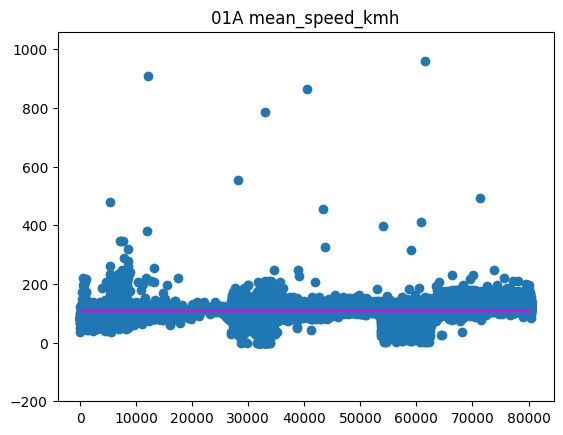

In [151]:
counting_loop_mean_speed_kmh = dataset_pboc_data_rv['mean_speed_kmh']
mean = dataset_pboc_data_rv['mean_speed_kmh'].mean()
std = dataset_pboc_data_rv['mean_speed_kmh'].std()
min_value = min(counting_loop_mean_speed_kmh)
max_value = max(counting_loop_mean_speed_kmh)

plt.title("01A mean_speed_kmh")
plt.ylim(-200, max_value + 100)
plt.scatter(x=counting_loop_mean_speed_kmh.index, y=counting_loop_mean_speed_kmh)
plt.hlines(y=mean, xmin=0, xmax=max(counting_loop_mean_speed_kmh.index), colors="#F000DE")
plt.show()

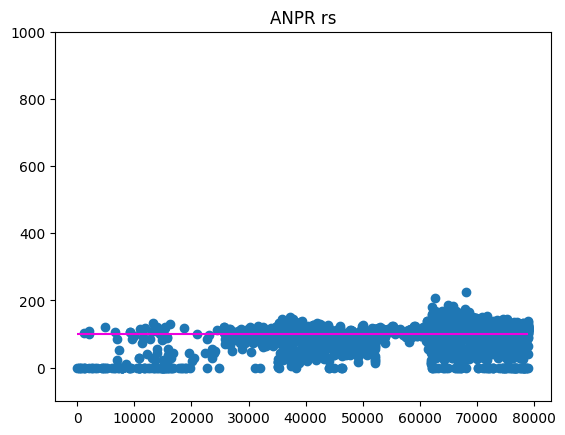

In [152]:
ANPR_rs = dataset_pfic_data_rv['rs']
mean = dataset_pfic_data_rv['rs'].mean()
std = dataset_pfic_data_rv['rs'].std()
min_value = min(ANPR_rs)
max_value = max(ANPR_rs)

plt.title("ANPR rs")
plt.ylim(-100, 1000)
plt.scatter(x=ANPR_rs.index, y=ANPR_rs)
plt.hlines(y=mean, xmin=0, xmax=max(ANPR_rs.index), colors="#F000DE")
plt.show()

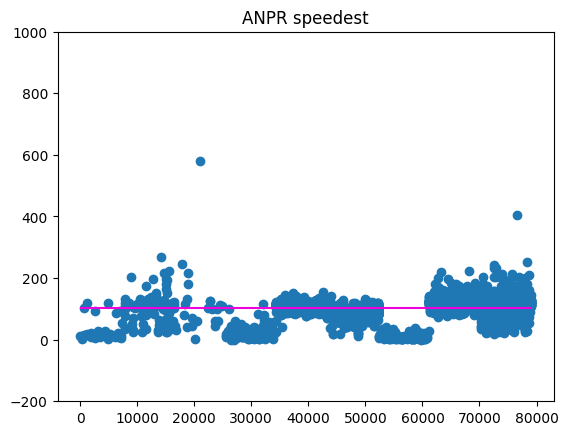

In [153]:
ANPR_speedest = dataset_pfic_data_rv['speedest']
mean = dataset_pfic_data_rv['speedest'].mean()
std = dataset_pfic_data_rv['speedest'].std()
min_value = min(ANPR_speedest)
max_value = max(ANPR_speedest)

plt.title("ANPR speedest")
plt.ylim(-200, 1000)
plt.scatter(x=ANPR_speedest.index, y=ANPR_speedest)
plt.hlines(y=mean, xmin=0, xmax=max(ANPR_speedest.index), colors="#F000DE")
plt.show()

In [122]:
dataset_pboc_data_rv.query('mean_speed_kmh == 0')

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-10-01 00:00:00+02:00,0.0,0
5,long,1,01A,2021-10-01 00:25:00+02:00,0.0,0
6,long,1,01A,2021-10-01 00:30:00+02:00,0.0,0
7,long,1,01A,2021-10-01 00:35:00+02:00,0.0,0
9,long,1,01A,2021-10-01 00:45:00+02:00,0.0,0
...,...,...,...,...,...,...
80455,short,3,01A,2021-10-31 23:35:00+01:00,0.0,0
80456,short,3,01A,2021-10-31 23:40:00+01:00,0.0,0
80457,short,3,01A,2021-10-31 23:45:00+01:00,0.0,0
80458,short,3,01A,2021-10-31 23:50:00+01:00,0.0,0


In [131]:
# dataset_pfic_data_rv.query('rs == 0')
dataset_pfic_data_rv.query('rs == 0 and count != 0')


,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.0,13.1,1
263,CPT-C-0002.1,-1,-1,2021-10-05 11:20:00+02:00,0.0,10.5,1
274,CPT-C-0002.1,-1,-1,2021-10-05 12:15:00+02:00,0.0,1.1,1
612,CPT-C-0002.1,-1,-1,2021-10-06 16:25:00+02:00,0.0,101.7,3
618,CPT-C-0002.1,-1,-1,2021-10-06 16:55:00+02:00,0.0,15.4,1
...,...,...,...,...,...,...,...
78348,CPT-C-0002.1,2,1,2021-10-29 13:20:00+02:00,0.0,143.0,1
78623,CPT-C-0002.1,2,1,2021-10-30 12:15:00+02:00,0.0,137.2,1
78637,CPT-C-0002.1,2,1,2021-10-30 13:25:00+02:00,0.0,144.5,1
78872,CPT-C-0002.1,2,1,2021-10-31 08:00:00+01:00,0.0,124.0,1


In [129]:
dataset_pfic_data_rv.query('rs == 0')


,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 13:30:00+02:00,0.0,0.0,0
2,CPT-C-0002.1,-1,-1,2021-10-04 13:35:00+02:00,0.0,0.0,0
3,CPT-C-0002.1,-1,-1,2021-10-04 13:40:00+02:00,0.0,0.0,0
4,CPT-C-0002.1,-1,-1,2021-10-04 13:45:00+02:00,0.0,0.0,0
...,...,...,...,...,...,...,...
79033,CPT-C-0002.1,2,1,2021-10-31 21:25:00+01:00,0.0,0.0,0
79034,CPT-C-0002.1,2,1,2021-10-31 21:30:00+01:00,0.0,0.0,0
79035,CPT-C-0002.1,2,1,2021-10-31 21:35:00+01:00,0.0,0.0,0
79036,CPT-C-0002.1,2,1,2021-10-31 21:40:00+01:00,0.0,0.0,0


## Transformation des dates pour faciliter leur gestion avec python

### Conversion vers le type datetime et suppression le l'info utc inutile.

In [132]:
dataset_pfic_data_rv["T"] = pd.to_datetime(dataset_pfic_data_rv["T"], exact=True ,utc=True)
dataset_pfic_data_rv['T'] = dataset_pfic_data_rv['T'].dt.tz_localize(None)

dataset_pboc_data_rv["timestamp"] = pd.to_datetime(dataset_pboc_data_rv["timestamp"], exact=True, utc=True)
dataset_pboc_data_rv['timestamp'] = dataset_pboc_data_rv['timestamp'].dt.tz_localize(None)


In [148]:
dataset_pfic_data_rv[dataset_pfic_data_rv["T"] == datetime.datetime(2021, 9, 30, 22, 00, 00)]

,B,lane,l,T,rs,speedest,count
25457,CPT-C-0002.1,1,-1,2021-09-30 22:00:00,118.700000,-1.000000,1
34390,CPT-C-0002.1,1,0,2021-09-30 22:00:00,111.804000,111.804000,25
43330,CPT-C-0002.1,1,1,2021-09-30 22:00:00,91.675000,92.250000,4
52269,CPT-C-0002.1,2,-1,2021-09-30 22:00:00,115.766667,-1.000000,3
61209,CPT-C-0002.1,2,0,2021-09-30 22:00:00,121.955556,122.944444,9


In [134]:
dataset_pboc_data_rv[dataset_pboc_data_rv["timestamp"] == datetime.datetime(2021, 9, 30, 22, 00, 00)]

,classification_value,loop,post,timestamp,mean_speed_kmh,count
0,long,1,01A,2021-09-30 22:00:00,0.000,0
8940,long,2,01A,2021-09-30 22:00:00,0.000,0
17880,long,3,01A,2021-09-30 22:00:00,0.000,0
26820,medium,1,01A,2021-09-30 22:00:00,0.000,0
35760,medium,2,01A,2021-09-30 22:00:00,0.000,0
44700,medium,3,01A,2021-09-30 22:00:00,0.000,0
53640,short,1,01A,2021-09-30 22:00:00,97.800,5
62580,short,2,01A,2021-09-30 22:00:00,118.125,8
71520,short,3,01A,2021-09-30 22:00:00,0.000,0


## counting loop 01A

In [158]:
dataframe=dataset_pboc_data_rv.copy()

Text(0.5, 0, 'Date')

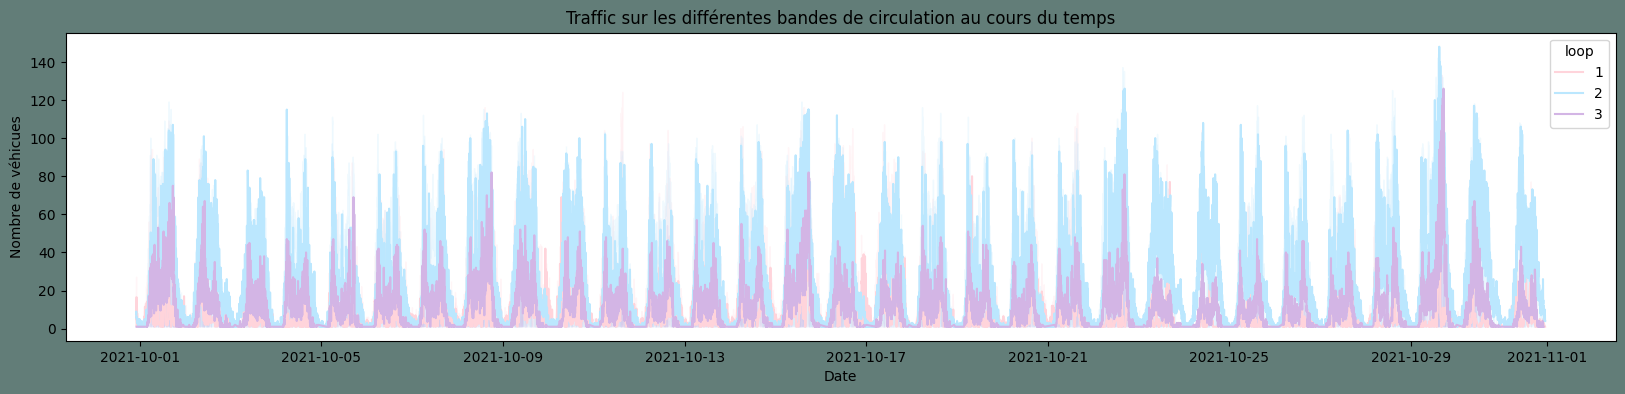

In [ ]:
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=dataframe['timestamp'],y="count",data=dataframe, hue="loop", palette=colors)
Time_series.set_title("Traffic sur les différentes bandes de circulation au cours du temps")
Time_series.set_ylabel("Nombre de véhicues")
Time_series.set_xlabel("Date")

## Remarques :


*   Le counting loop 01A semble, en générale, detecter plus de véhicule via la loop 2.
*   La fréquence du nombre de véhicule donne un paterne qui se répète.

* Donne une vue global et non détaillée.



## Feature Engineering

### Division de la feature timestamp pour mieux comprendre les données

Visualiser le nombre de véhicule par années et par mois n'avait pas de sens étant donné que les données fournies ne s'étendent que du 30/9/2021 au 31/10/2021.

In [159]:
# Ajout de features
dataframe["Date_no"] = dataframe['timestamp'].dt.day
dataframe["Hour"] = dataframe['timestamp'].dt.hour
dataframe["Day"] = dataframe.timestamp.dt.strftime("%A")
dataframe.head()

,classification_value,loop,post,timestamp,mean_speed_kmh,count,Date_no,Hour,Day
1,long,1,01A,2021-09-30 22:05:00,81.000000,4,30,22,Thursday
2,long,1,01A,2021-09-30 22:10:00,82.333333,3,30,22,Thursday
3,long,1,01A,2021-09-30 22:15:00,85.000000,6,30,22,Thursday
4,long,1,01A,2021-09-30 22:20:00,83.000000,1,30,22,Thursday
8,long,1,01A,2021-09-30 22:40:00,83.500000,2,30,22,Thursday


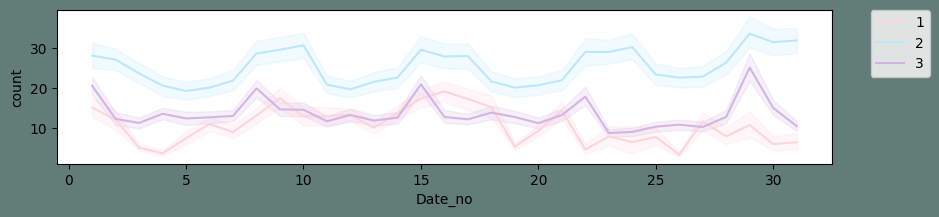

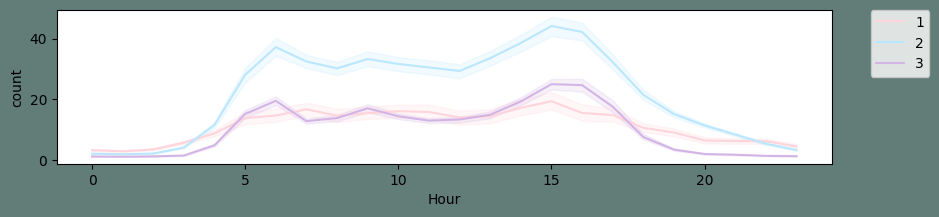

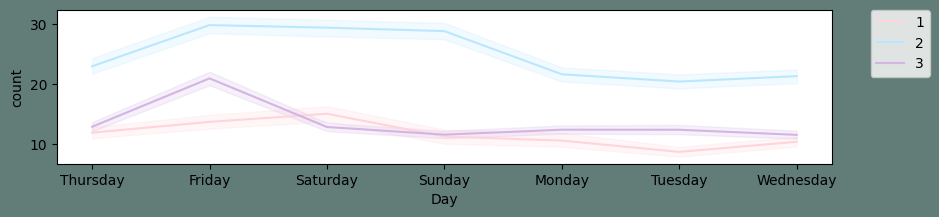

In [162]:
new_features = ["Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=dataframe[i],y="count",data=dataframe, hue="loop", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## ANPR camera (pfic_data_rv)

In [136]:
dataframe2 = dataset_pfic_data_rv.copy()


Text(0.5, 0, 'Date')

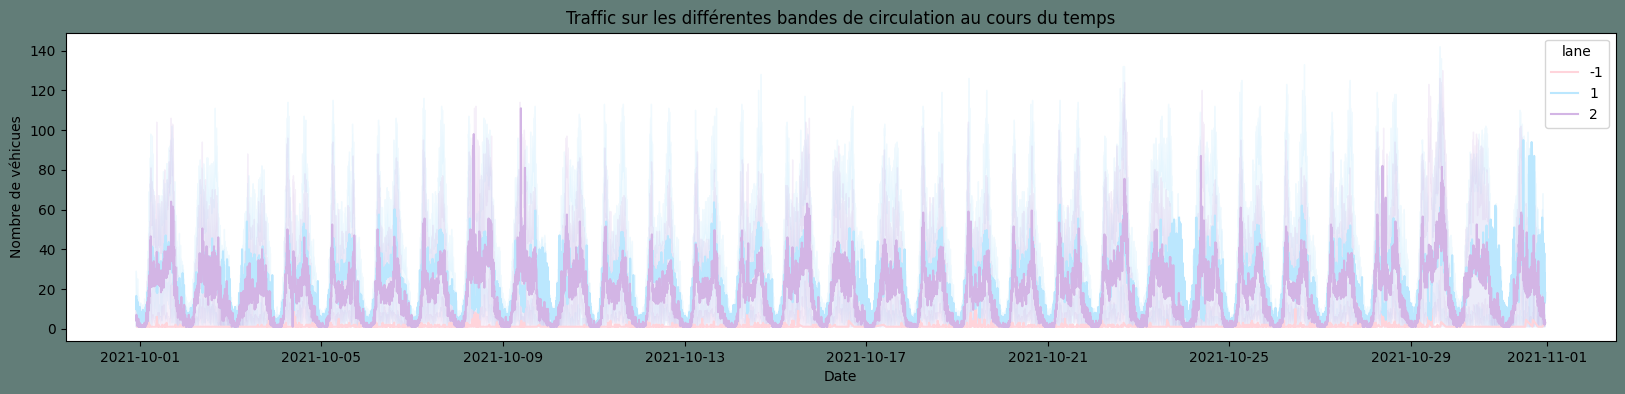

In [ ]:
# Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=dataframe2['T'],y="count",data=dataframe2, hue="lane", palette=colors)
Time_series.set_title("Traffic sur les différentes bandes de circulation au cours du temps")
Time_series.set_ylabel("Nombre de véhicues")
Time_series.set_xlabel("Date")

In [137]:
# Ajout de features
dataframe2["Date_no"] = dataframe2['T'].dt.day
dataframe2["Hour"] = dataframe2['T'].dt.hour
dataframe2["Day"] = dataframe2['T'].dt.strftime("%A")
dataframe2.head()

,B,lane,l,T,rs,speedest,count,Date_no,Hour,Day
0,CPT-C-0002.1,-1,-1,2021-10-04 11:25:00,0.0,13.1,1,4,11,Monday
1,CPT-C-0002.1,-1,-1,2021-10-04 11:30:00,0.0,0.0,0,4,11,Monday
2,CPT-C-0002.1,-1,-1,2021-10-04 11:35:00,0.0,0.0,0,4,11,Monday
3,CPT-C-0002.1,-1,-1,2021-10-04 11:40:00,0.0,0.0,0,4,11,Monday
4,CPT-C-0002.1,-1,-1,2021-10-04 11:45:00,0.0,0.0,0,4,11,Monday


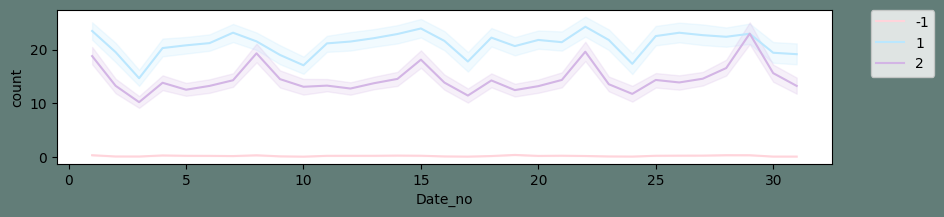

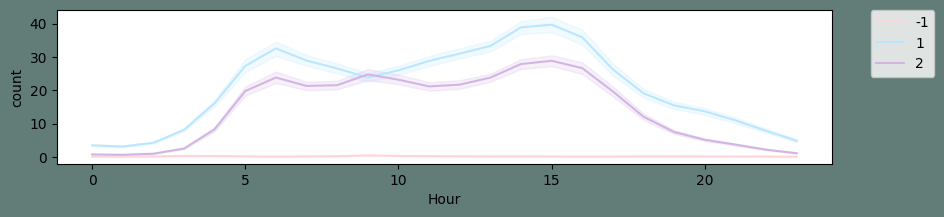

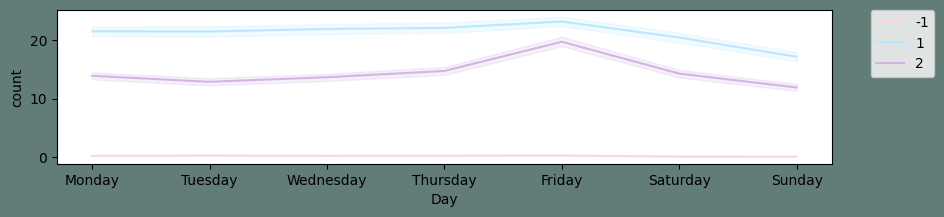

In [163]:
new_features = ["Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=dataframe2[i],y="count",data=dataframe2, hue="lane", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='Date_no', ylabel='count'>

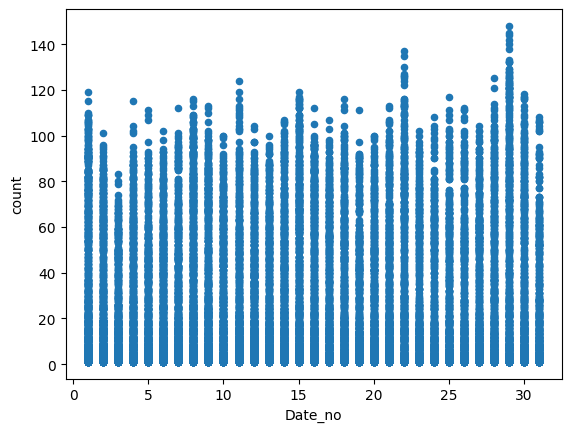

In [ ]:
dataframe.plot.scatter(x='Date_no', y='count')
# os_scan_data.plot.scatter(x='Interarrivals', y='Dst Port')

<Axes: xlabel='Date_no', ylabel='count'>

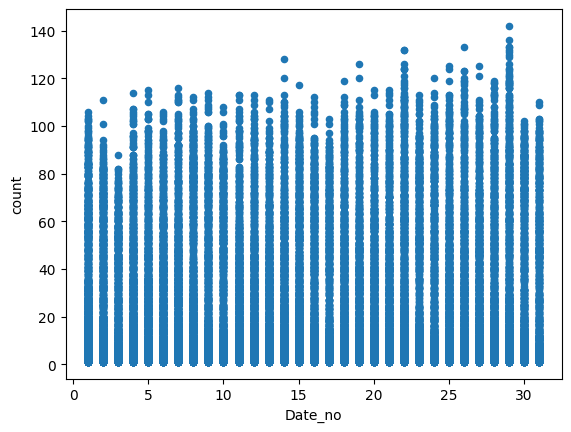

In [ ]:
dataframe2.plot.scatter(x='Date_no', y='count')
# os_scan_data.plot.scatter(x='Interarrivals', y='Dst Port')

<Axes: xlabel='Day', ylabel='count'>

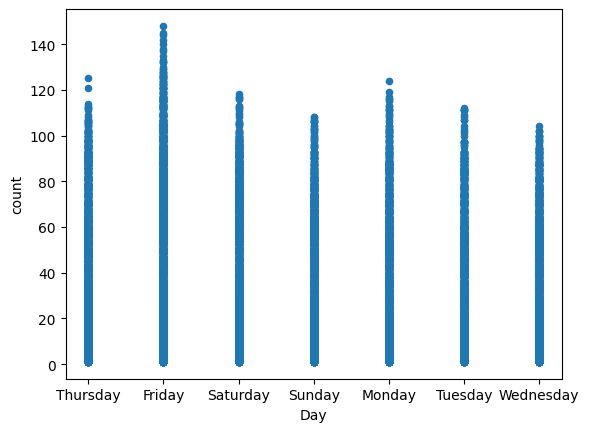

In [ ]:
dataframe.plot.scatter(x='Day', y='count')


<Axes: xlabel='Day', ylabel='count'>

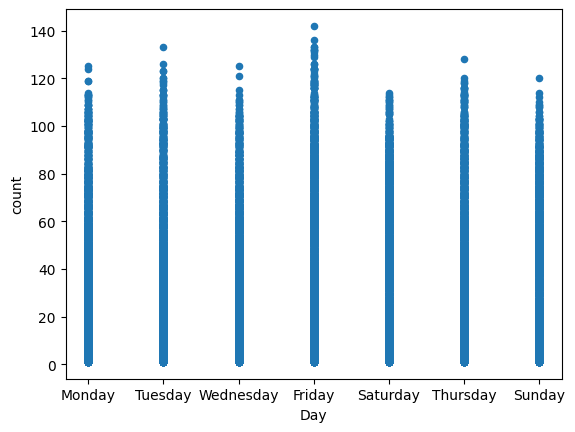

In [ ]:
dataframe2.plot.scatter(x='Day', y='count')

<Axes: xlabel='Hour', ylabel='count'>

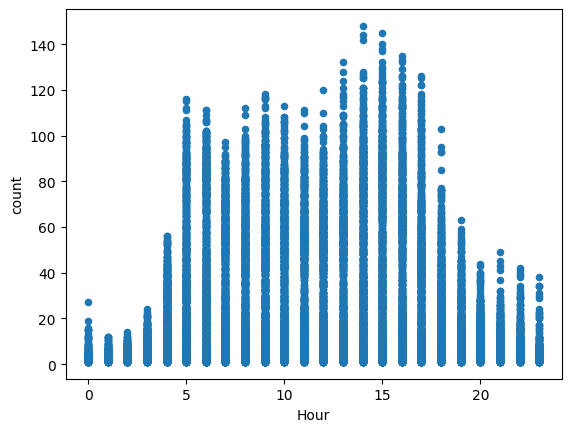

In [ ]:
dataframe.plot.scatter(x='Hour', y='count')

<Axes: xlabel='Hour'>

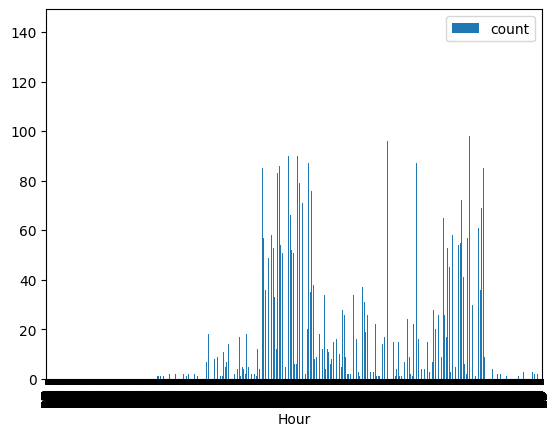

In [138]:
dataframe2.plot.bar(x='Hour', y='count')

<Axes: xlabel='loop', ylabel='count'>

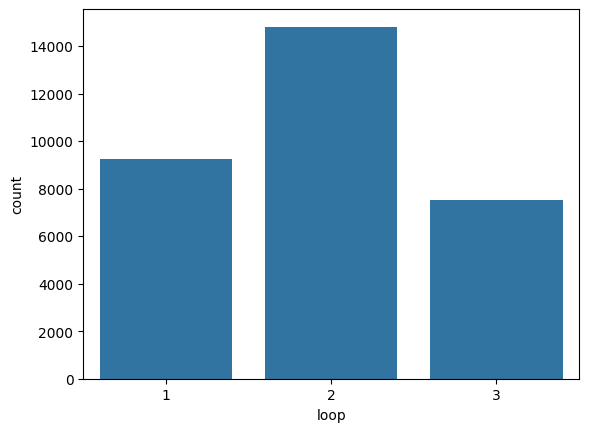

In [ ]:
# plt.figure(figsize=(10,4))
sns.countplot(x = 'loop', data = dataframe)

<Axes: xlabel='lane', ylabel='count'>

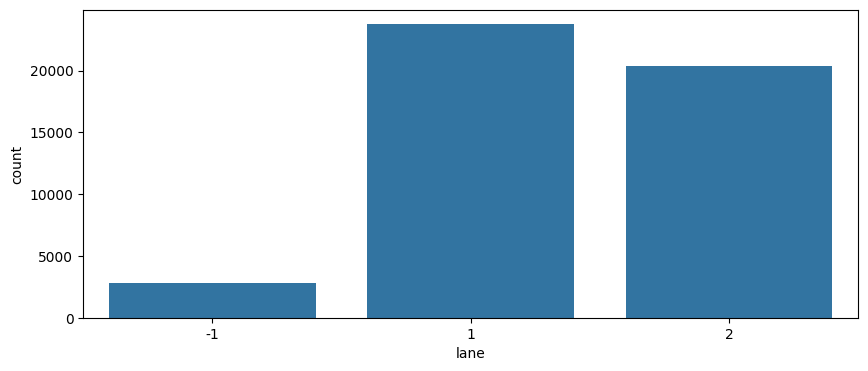

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x = 'lane', data = dataframe2)

In [ ]:
dataset_pboc_data_rv[dataset_pboc_data_rv["loop"] == 1]

,classification_value,loop,post,timestamp,mean_speed_kmh,count
1,long,1,01A,2021-09-30 22:05:00,81.000000,4
2,long,1,01A,2021-09-30 22:10:00,82.333333,3
3,long,1,01A,2021-09-30 22:15:00,85.000000,6
4,long,1,01A,2021-09-30 22:20:00,83.000000,1
8,long,1,01A,2021-09-30 22:40:00,83.500000,2
...,...,...,...,...,...,...
97273,short,1,01A,2021-10-31 21:45:00,88.000000,1
97274,short,1,01A,2021-10-31 21:50:00,86.400000,5
97275,short,1,01A,2021-10-31 21:55:00,95.400000,5
97276,short,1,01A,2021-10-31 22:00:00,99.000000,3


In [ ]:
dataset_pboc_data_rv[dataset_pboc_data_rv["loop"] == 2]

,classification_value,loop,post,timestamp,mean_speed_kmh,count
17617,long,2,01A,2021-09-30 22:00:00,NaN,0
17618,long,2,01A,2021-09-30 22:05:00,NaN,0
17619,long,2,01A,2021-09-30 22:10:00,NaN,0
17620,long,2,01A,2021-09-30 22:15:00,NaN,0
17621,long,2,01A,2021-09-30 22:20:00,NaN,0
...,...,...,...,...,...,...
114900,short,2,01A,2021-10-31 22:35:00,130.750000,4
114901,short,2,01A,2021-10-31 22:40:00,131.833333,6
114902,short,2,01A,2021-10-31 22:45:00,122.000000,10
114903,short,2,01A,2021-10-31 22:50:00,115.000000,4


<Axes: xlabel='lane', ylabel='count'>

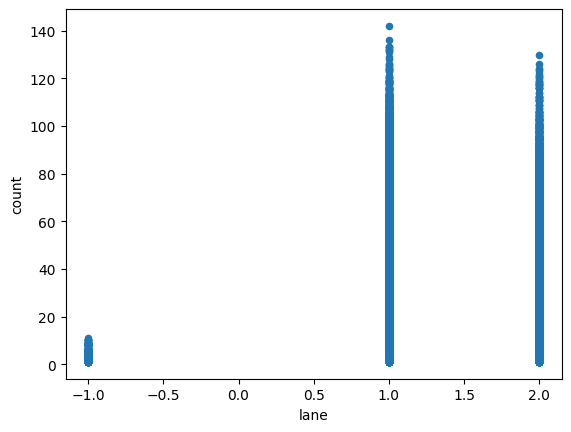

In [ ]:
dataframe2.plot.scatter(x='lane', y='count')

<Axes: xlabel='loop', ylabel='count'>

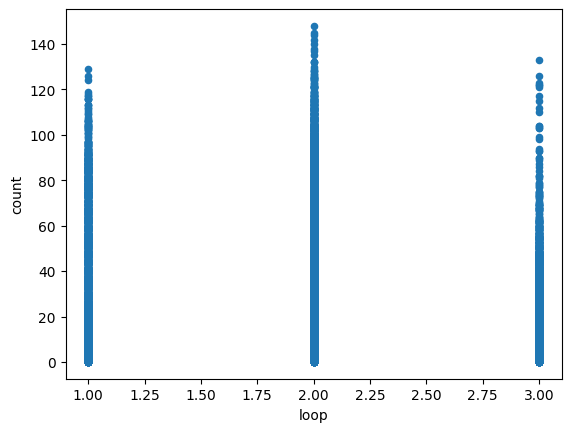

In [ ]:
dataframe.plot.scatter(x='loop', y='count')

In [ ]:
dataset_pfic_data_rv.query('lane == -1 and speedest > 0.0')

,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.000000,13.100000,1
263,CPT-C-0002.1,-1,-1,2021-10-05 11:20:00+02:00,0.000000,10.500000,1
274,CPT-C-0002.1,-1,-1,2021-10-05 12:15:00+02:00,0.000000,1.100000,1
612,CPT-C-0002.1,-1,-1,2021-10-06 16:25:00+02:00,0.000000,101.700000,3
618,CPT-C-0002.1,-1,-1,2021-10-06 16:55:00+02:00,0.000000,15.400000,1
...,...,...,...,...,...,...,...
23643,CPT-C-0002.1,-1,1,2021-10-25 17:00:00+02:00,30.233333,45.800000,3
23915,CPT-C-0002.1,-1,1,2021-10-26 15:40:00+02:00,43.250000,99.550000,2
24157,CPT-C-0002.1,-1,1,2021-10-27 11:50:00+02:00,50.250000,61.650000,2
24492,CPT-C-0002.1,-1,1,2021-10-28 15:45:00+02:00,113.300000,112.000000,1


In [ ]:
dataset_pfic_data_rv[dataset_pfic_data_rv["lane"] == -1]


,B,lane,l,T,rs,speedest,count
0,CPT-C-0002.1,-1,-1,2021-10-04 13:25:00+02:00,0.0,13.1,1
1,CPT-C-0002.1,-1,-1,2021-10-04 13:30:00+02:00,NaN,NaN,0
2,CPT-C-0002.1,-1,-1,2021-10-04 13:35:00+02:00,NaN,NaN,0
3,CPT-C-0002.1,-1,-1,2021-10-04 13:40:00+02:00,NaN,NaN,0
4,CPT-C-0002.1,-1,-1,2021-10-04 13:45:00+02:00,NaN,NaN,0
...,...,...,...,...,...,...,...
25452,CPT-C-0002.1,-1,1,2021-10-31 22:45:00+01:00,NaN,NaN,0
25453,CPT-C-0002.1,-1,1,2021-10-31 22:50:00+01:00,NaN,NaN,0
25454,CPT-C-0002.1,-1,1,2021-10-31 22:55:00+01:00,NaN,NaN,0
25455,CPT-C-0002.1,-1,1,2021-10-31 23:00:00+01:00,NaN,NaN,0
